In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [3]:
%matplotlib inline

In [4]:
IMG_DIM = (150,150)

train_files = glob.glob('training_Data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img
             in train_files]

train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[1].split('.')[0].strip() 
                for fn in train_files]

In [5]:
validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM))
                  for img in validation_files]
validation_imgs = np.array(validation_imgs)

validation_labels = [fn.split('/')[1].split('.')[0].strip()
                    for fn in validation_files]

In [6]:
print('Train dataset shape:', train_imgs.shape)
print('Val dataset shape:', validation_imgs.shape)

Train dataset shape: (2930, 150, 150, 3)
Val dataset shape: (993, 150, 150, 3)


In [7]:
train_imgs_scaled = train_imgs.astype('float32')

In [8]:
validation_imgs_scaled = validation_imgs.astype('float32')

In [9]:
train_imgs_scaled.shape

(2930, 150, 150, 3)

In [10]:
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

In [11]:
print(train_imgs[0].shape)

(150, 150, 3)


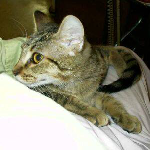

In [12]:
array_to_img(train_imgs[46])

Encoding '0' for cat, '1' for dog

In [13]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
train_labels[46]

'cat'

In [16]:
le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

In [17]:
print(train_labels[1495:1505], train_labels_enc[1495:1505])

['cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat'] [0 1 0 1 0 0 1 1 0 0]


CNN architecture

In [18]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

In [19]:
model = Sequential()

In [20]:
# convolution and pooling layers
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu',
                    input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [21]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(),
             metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [23]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                   validation_data=(validation_imgs_scaled,
                                   validation_labels_enc),
                   batch_size=batch_size,
                    epochs=epochs,
                   verbose=1)

Epoch 1/30
98/98 [==============================] - 43s 427ms/step - loss: 1.1983 - accuracy: 0.5367 - val_loss: 0.6455 - val_accuracy: 0.6576
Epoch 2/30
98/98 [==============================] - 54s 555ms/step - loss: 0.6454 - accuracy: 0.6298 - val_loss: 0.6034 - val_accuracy: 0.6959
Epoch 3/30
98/98 [==============================] - 41s 413ms/step - loss: 0.5518 - accuracy: 0.7241 - val_loss: 0.5413 - val_accuracy: 0.7452
Epoch 4/30
98/98 [==============================] - 39s 397ms/step - loss: 0.4561 - accuracy: 0.7911 - val_loss: 0.5409 - val_accuracy: 0.7442
Epoch 5/30
98/98 [==============================] - 41s 418ms/step - loss: 0.3800 - accuracy: 0.8291 - val_loss: 0.5960 - val_accuracy: 0.7432
Epoch 6/30
98/98 [==============================] - 40s 404ms/step - loss: 0.2829 - accuracy: 0.8863 - val_loss: 0.6203 - val_accuracy: 0.7452
Epoch 7/30
98/98 [==============================] - 39s 400ms/step - loss: 0.2016 - accuracy: 0.9191 - val_loss: 0.7745 - val_accuracy: 0.7120

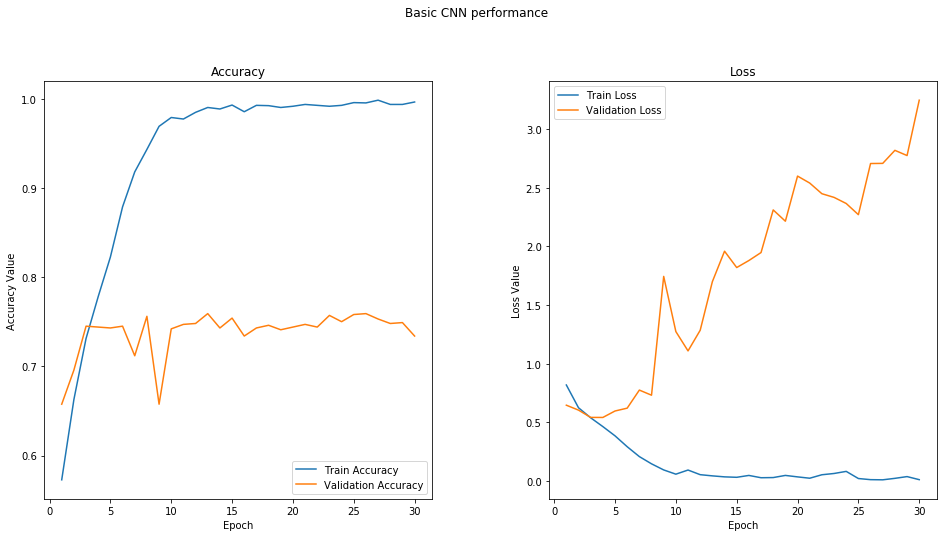

In [24]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
t = f.suptitle('Basic CNN performance', fontsize = 12)
f.subplots_adjust(top=0.85, wspace=0.3)


epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy') 
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy') 
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss') 
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss') 
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [25]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu',
                    input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile(loss='binary_crossentropy',
             optimizer = optimizers.RMSprop(),
             metrics=['accuracy'])

In [27]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                       validation_data=(validation_imgs_scaled,
                                        validation_labels_enc),
                       batch_size=batch_size,
                       epochs=epochs,
                       verbose=1)

Epoch 1/30
98/98 [==============================] - 32s 317ms/step - loss: 0.7821 - accuracy: 0.5142 - val_loss: 0.6849 - val_accuracy: 0.5045
Epoch 2/30
98/98 [==============================] - 31s 315ms/step - loss: 0.7062 - accuracy: 0.4990 - val_loss: 0.6895 - val_accuracy: 0.5186
Epoch 3/30
98/98 [==============================] - 32s 327ms/step - loss: 0.6893 - accuracy: 0.5509 - val_loss: 0.6581 - val_accuracy: 0.6133
Epoch 4/30
98/98 [==============================] - 31s 319ms/step - loss: 0.6770 - accuracy: 0.6406 - val_loss: 0.7219 - val_accuracy: 0.5921
Epoch 5/30
98/98 [==============================] - 31s 315ms/step - loss: 0.6193 - accuracy: 0.6705 - val_loss: 1.0516 - val_accuracy: 0.5539
Epoch 6/30
98/98 [==============================] - 31s 317ms/step - loss: 0.5884 - accuracy: 0.7094 - val_loss: 0.5738 - val_accuracy: 0.7090
Epoch 7/30
98/98 [==============================] - 33s 335ms/step - loss: 0.5481 - accuracy: 0.7263 - val_loss: 0.6782 - val_accuracy: 0.7180

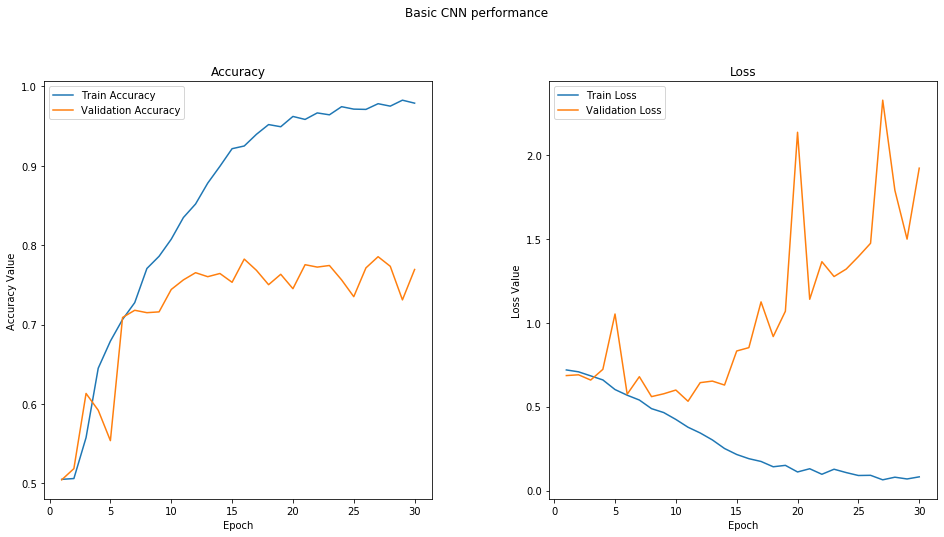

In [28]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
t = f.suptitle('Basic CNN performance', fontsize = 12)
f.subplots_adjust(top=0.85, wspace=0.3)


epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy') 
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy') 
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss') 
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss') 
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

Image augmentation


In [29]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3,
                                      rotation_range=50,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [30]:
val_datagen = ImageDataGenerator(rescale=1./255)

Labels: ['cat', 'cat', 'cat', 'cat', 'cat']


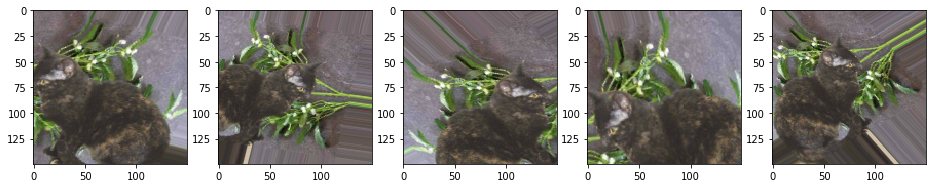

In [31]:
img_id = 2595
cat_generator = train_datagen.flow(train_imgs[img_id:img_id+1],
                                      train_labels[img_id:img_id+1],
                                      batch_size=1)
cat = [next(cat_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]


Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


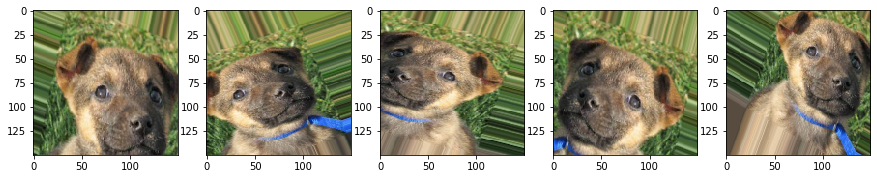

In [32]:

img_id = 1993
dog_generator = train_datagen.flow(train_imgs[img_id:img_id+1],
                                      train_labels[img_id:img_id+1],
                                      batch_size=1)
dog = [next(dog_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in dog])
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,5)]

In [33]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc,
                                        batch_size=10)
val_generator = val_datagen.flow(validation_imgs,
                                    validation_labels_enc,
                                    batch_size=3)
input_shape = (150,150,3)

In [34]:
train_labels_enc.shape

(2930,)

In [35]:
model = Sequential()
   # convolution and pooling layers
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu',
                    input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)      

In [36]:
model.compile(loss='binary_crossentropy',
                 optimizer=optimizers.RMSprop(lr=1e-4),
                 metrics=['accuracy'])


In [37]:
history = model.fit(train_generator,
                                 steps_per_epoch=293, epochs=50,
                                 validation_data=val_generator,
                                 validation_steps=331, verbose=1)

Epoch 1/50
293/293 [==============================] - 49s 163ms/step - loss: 0.6964 - accuracy: 0.5009 - val_loss: 0.6869 - val_accuracy: 0.5519
Epoch 2/50
293/293 [==============================] - 44s 149ms/step - loss: 0.6882 - accuracy: 0.5416 - val_loss: 0.6738 - val_accuracy: 0.5791
Epoch 3/50
293/293 [==============================] - 44s 150ms/step - loss: 0.6773 - accuracy: 0.5638 - val_loss: 0.7426 - val_accuracy: 0.5347
Epoch 4/50
293/293 [==============================] - 49s 169ms/step - loss: 0.6617 - accuracy: 0.6094 - val_loss: 0.6936 - val_accuracy: 0.5639
Epoch 5/50
293/293 [==============================] - 42s 143ms/step - loss: 0.6505 - accuracy: 0.6128 - val_loss: 0.6252 - val_accuracy: 0.6365
Epoch 6/50
293/293 [==============================] - 41s 139ms/step - loss: 0.6409 - accuracy: 0.6344 - val_loss: 0.6160 - val_accuracy: 0.6465
Epoch 7/50
293/293 [==============================] - 42s 145ms/step - loss: 0.6259 - accuracy: 0.6488 - val_loss: 0.5808 - val_ac

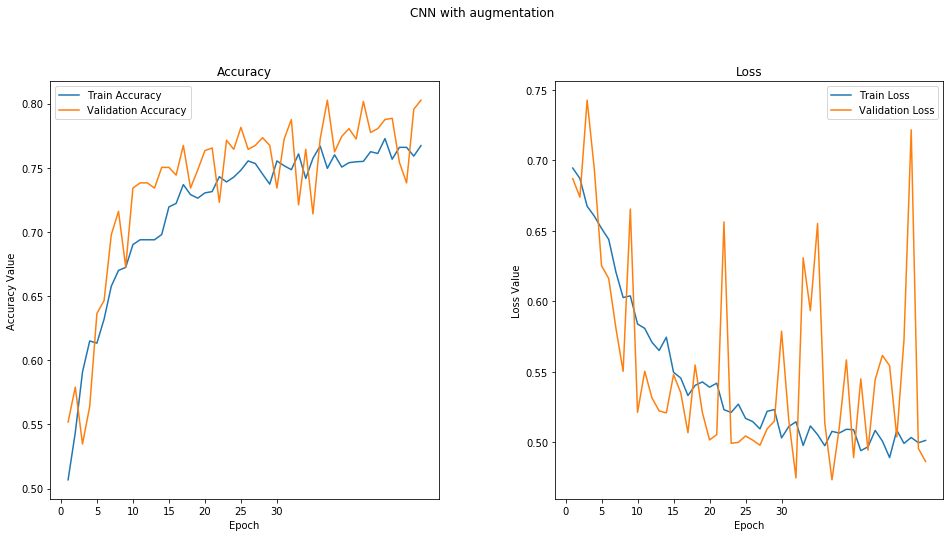

In [39]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
t = f.suptitle('CNN with augmentation', fontsize = 12)
f.subplots_adjust(top=0.85, wspace=0.3)


epoch_list = list(range(1,51))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy') 
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy') 
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss') 
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss') 
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")